In [12]:
from Bio.PDB import *
from Bio.PDB.Polypeptide import is_aa
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
regex = re.compile('[^0-9]')

clearEmpty = lambda x: [ i for i in x if i != '']

def parse_interval(interval):
    segs = [ seg.split("-")  for seg in interval.split(",")]
    segs = [ clearEmpty(s) for s in segs ]
    return [ [ int(regex.sub('', s[0])), int(regex.sub('', s[1]).split(":")[0]) ] for s in segs]

def sum_interval(interval):
    return sum([i[1]-i[0]+1 for i in parse_interval(interval)])



Wieviele Zeichen haben Sequenzen laut CATHDB Interval und wie viele Zeichen sind es tatsächlich

In [ ]:
# cath_meta.pdb.apply(lambda x: readPDB("%s%s.fasta" % ("../data/pdb_str/fasta/", x)))
pdbids =[ f.split(".")[0] for f in listdir("../data/pdb_str/fasta/") ]
seq = [ readPDB("%s%s.fasta" % ("../data/pdb_str/fasta/", x))  for x in pdbids ]
cathdb = pd.DataFrame({"pdb":pdbids, "seq":seq})
cathdb["N"] = cathdb.seq.apply(len)
cathdb = pd.merge(cath_meta, cathdb, how="inner", on="pdb")
cathdb["cathdb_N"] = cathdb.range.apply( sum_interval )
cathdb
cathdb[cathdb.N != cathdb.cathdb_N][["pdb", "range", "N", "cathdb_N"]].head(10)

In [3]:
clearEmpty = lambda x: [ i for i in x if i != '']
regex = re.compile('[^0-9]')

def check_selection_resolved(pdb, sele):
    pymol.cmd.fetch(pdb, async_=0)
    resis_resolved = pymol.cmd.iterate_state(-1, sele + " and name ca", 'pass')
    resis = pymol.cmd.iterate(sele + " and name ca", 'pass')
#     print(sele)
#     print(resis_resolved)
#     print(resis)
    if resis_resolved == resis:
        return True
    else:
        return False


def parse_interval(pdb, rng):
    segs = [ seg.split("-")  for seg in rng.split(",")]
    segs = [ clearEmpty(s) for s in segs ]
    res = ",".join([ "%s:%s" % (int(regex.sub('', s[0])), int(regex.sub('', s[1]).split(":")[0])) for s in segs])
    return res
#     return [ [ int(s[0]), int(s[1].split(":")[0]) ] for s in segs]

NameError: name 're' is not defined

In [112]:
pdb_intervals = pd.read_csv("data/cath-b-newest-all", sep=" ", names =["pdb", "version", "cath", "range"])
pdb_intervals = pdb_intervals[ (pdb_intervals.pdb == "12asA00") | (pdb_intervals.pdb == "10gsA01") ]
# pdb_intervals = pdb_intervals[["pdb", "range"]].head(20)
pdb_intervals["range"] = pdb_intervals[["pdb", "range"]].apply(lambda x: parse_interval(x.pdb, x.range), axis=1)
pdb_intervals

,pdb,version,cath,range
16,10gsA01,v4_2_0,3.40.30.10,"2:78,187:208"
59,12asA00,v4_2_0,3.30.930.10,4:330


In [121]:
pymol.cmd.reinitialize()
for i in range(4,331):
    resolved = check_selection_resolved("12as", "12as and resi %s-%s" % (i, i))
    if not resolved:
        print("resi %s-%s" % (i, i))

In [123]:
check_selection_resolved("12as", "12as and resi 4-330")
# check_selection_resolved("12as", "12as")

True

In [13]:
# https://github.com/biopython/biopython/issues/992
# parser = PDBParser()
parser = PDBParser(PERMISSIVE=0)
structure = parser.get_structure('1a0h', "../data/pdb_str/atoms/155cA00")
# structure = parser.get_structure('1a0h', "../data/pdb_str/pdb/1a0h.ent")

In [19]:
parser = PDBParser(PERMISSIVE=0)
structure = parser.get_structure('1a0h', "../data/pdb_str/atoms/1914A00")

for model in structure :
    for chain in model :
        poly = Polypeptide.Polypeptide(chain)
        aa_sequence = [ p  for p in poly.get_sequence()]
        chain_id = chain.id
        resseq = [res.get_id()[1] for res in chain]
        print(resseq)
        print("".join(aa_sequence))
        start = resseq[0]
        end = resseq[-1]
        print(chain.id, start, end)
#             if not is_aa(res):
#                 print(chain, res.child_dict , is_aa(res))
                

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 407

In [18]:
parser = PDBParser(PERMISSIVE=0)
structure = parser.get_structure('1a0h', "../data/pdb_str/pdb/1914.ent")

for model in structure :
    for chain in model :
        poly = Polypeptide.Polypeptide(chain)
        aa_sequence = [ p  for p in poly.get_sequence()]
        chain_id = chain.id
        resseq = [res.get_id()[1] for res in chain]
        print(resseq)
        print("".join(aa_sequence))
        start = resseq[0]
        end = resseq[-1]
        print(chain.id, start, end)


[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 407

In [63]:
res_list = Selection.unfold_entities(structure, 'R')
chain_list = Selection.unfold_entities(structure, 'C')
atom_list = Selection.unfold_entities(chain_list[0], 'A')
model_list = Selection.unfold_entities(structure, 'M')
str_list = Selection.unfold_entities(structure, 'S')

In [48]:
str_list

[<Structure id=155c>]

In [4]:
structure.header['keywords']

'ligase, asparagine synthetase, nitrogen fixation'

In [5]:
structure.header['resolution']

2.2

In [6]:
structure.header['structure_method']

'x-ray diffraction'

In [7]:
structure.header['compound']

{'1': {'misc': '',
  'molecule': 'asparagine synthetase',
  'chain': 'a, b',
  'synonym': 'l-aspartate\\',
  'ec_number': '6.3.1.1',
  'ec': '6.3.1.1',
  'engineered': 'yes',
  'mutation': 'yes'}}

In [8]:
# Iterate over all atoms in a structure
for atom in structure.get_atoms():
    print(atom)


<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom OH>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom CE>
<Atom NZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom N>
<Atom

<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom SD>
<Atom CE>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG1>

<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom SD>
<Atom CE>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG1>
<Atom CG2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG1>
<Atom CG2>
<Atom 

<Atom CD>
<Atom CE>
<Atom NZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<A

<Atom C>
<Atom O>
<Atom CB>
<Atom OG1>
<Atom CG2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom OG>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom ND1>
<Atom CD2>
<Atom CE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom OD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG1>
<Atom CG2>
<Atom CD1>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<At

In [9]:
# Obviously, A=atom, R=residue, C=chain, M=model, S=structure
res_list = Selection.unfold_entities(structure, 'R')
chain_list = Selection.unfold_entities(structure, 'C')
atom_list = Selection.unfold_entities(chain_list[0], 'A')
model_list = Selection.unfold_entities(structure, 'M')
str_list = Selection.unfold_entities(structure, 'S')

In [10]:
# len(chain_list[0])
len(chain_list[1])

430

In [11]:
list(set([a.get_altloc() for a in atom_list]))

[' ']

In [59]:
import pymol

def check_selection_resolved(pdb, sele):
    pymol.cmd.fetch(pdb, async_=0)
    resis_resolved = pymol.cmd.iterate_state(-1, sele + " and name ca", 'pass')
    resis = pymol.cmd.iterate(sele + " and name ca", 'pass')
    print(sele)
    print(resis_resolved)
    print(resis)
    if resis_resolved == resis:
        return True
    else:
        return False




In [60]:
# https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ

In [66]:
pymol.cmd.reinitialize()
for i in range(0,331):
    resolved = check_selection_resolved("12as", "12as and resi %s-%s" % (i, i))
#     if not resolved resi %s-%s" % (i, i))

12as and resi 0-0
0
0
12as and resi 1-1
0
2
12as and resi 2-2
0
2
12as and resi 3-3
0
2
12as and resi 4-4
2
2
12as and resi 5-5
2
2
12as and resi 6-6
2
2
12as and resi 7-7
2
2
12as and resi 8-8
2
2
12as and resi 9-9
2
2
12as and resi 10-10
2
2
12as and resi 11-11
2
2
12as and resi 12-12
2
2
12as and resi 13-13
2
2
12as and resi 14-14
2
2
12as and resi 15-15
2
2
12as and resi 16-16
2
2
12as and resi 17-17
2
2
12as and resi 18-18
2
2
12as and resi 19-19
2
2
12as and resi 20-20
2
2
12as and resi 21-21
2
2
12as and resi 22-22
2
2
12as and resi 23-23
2
2
12as and resi 24-24
2
2
12as and resi 25-25
2
2
12as and resi 26-26
2
2
12as and resi 27-27
2
2
12as and resi 28-28
2
2
12as and resi 29-29
2
2
12as and resi 30-30
2
2
12as and resi 31-31
2
2
12as and resi 32-32
2
2
12as and resi 33-33
2
2
12as and resi 34-34
2
2
12as and resi 35-35
2
2
12as and resi 36-36
2
2
12as and resi 37-37
2
2
12as and resi 38-38
2
2
12as and resi 39-39
2
2
12as and resi 40-40
2
2
12as and resi 41-41
2
2
12as and res

In [50]:
print(check_selection_resolved("12as", "12as"))

656
662
False


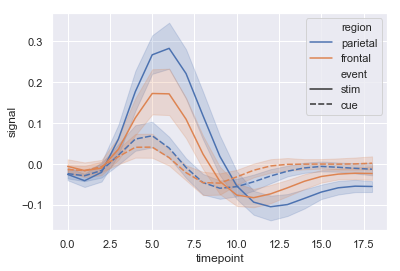

In [7]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

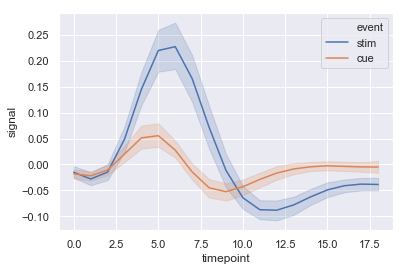

In [9]:
sns.lineplot(x="timepoint", y="signal",
             hue="event", data=fmri)